In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
sys.path.append('../scripts')
from scripts.data_handler import DataOrganize, DataModes

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_organize = DataOrganize()
data_organize.create_clean_data(mode=DataModes.RANDOM_1000)
print(len(data_organize.data))

100%|██████████| 744/744 [00:00<00:00, 47614.55it/s]


744


In [10]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix
from scripts.sentiment_analysis_evaluator import Evaluator

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_vader = Evaluator(model = None,tokenizer = None,data=filtered_data)
accuracy = evaluator_vader.evaluate_vader()
print(f"Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

Vader Sentiment Analysis: 100%|██████████| 429/429 [00:06<00:00, 66.49it/s]


Accuracy of Vader sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.81


In [ ]:
evaluator_vader.show_confusion_matrix()

In [ ]:
evaluator_vader.show_bad_samples(num = 10)


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scripts.sentiment_analysis_evaluator import Evaluator

from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix

model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_finbert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_finbert.evaluate_model_fin_bert()
print(f"Accuracy of finbert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

In [ ]:
evaluator_finbert.show_confusion_matrix()

In [ ]:
evaluator_finbert.show_bad_samples(num=10)

In [3]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import importlib
class_name = importlib.import_module("sentiment_analysis_evaluator")
importlib.reload(class_name)
from scripts.sentiment_analysis_evaluator import Evaluator
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_cryptobert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_cryptobert.evaluate_model_crypto_bert()
print(f"Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

CryptoBERT Sentiment Analysis: 100%|██████████| 434/434 [00:43<00:00,  9.96it/s]

Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.85


Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.85


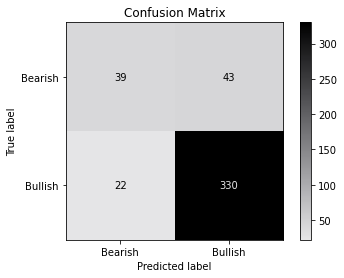

In [4]:
print(f"Accuracy of cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")
evaluator_cryptobert.show_confusion_matrix()

In [6]:
evaluator_cryptobert.show_bad_samples(num=20)

Actual Label: Bearish
Predicted Label: Bullish
Text: $BTC.X \nLove to see $31-31,500 and watch all the shitcoins get absolutely REKT\n$ETH.X $ADA.X $DOGE.X $XRP.X
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X Here&#39;s the truth. This meme token is STILL down 16% on the year. XRP is the chosen one. You know what to do..
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X    So rigged   All no name cryptos trending \n\nOk so those are more bought and desired ???  Wrong.  It’s manipulated. They hold the big ones back  $ETH.X $XRP.X
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X \nPeople who buy and hold ADA
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X \nAny mention of an ADA ETF?, asking for a friend.
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X $ADA Cardano **Perps Short** \nTarget PT .05 \nhttps://www.coingecko.com/en/coins/cardano
Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X here&#39;s the truth. XRP is t

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline



from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
import importlib
class_name = importlib.import_module("sentiment_analysis_evaluator")
importlib.reload(class_name)
from scripts.sentiment_analysis_evaluator import Evaluator
model_name = "kk08/CryptoBERT"
tokenizer = BertTokenizer.from_pretrained(model_name, use_fast=True)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels = 2)
filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_cryptobert2 = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_cryptobert2.evaluate_model_crypto_bert2()


KeyboardInterrupt: 

Accuracy of cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.75


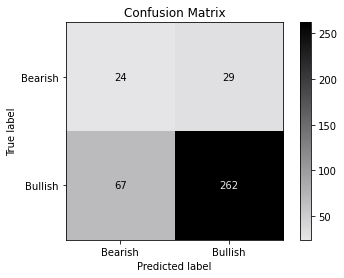

In [5]:
print(f"Accuracy of cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")
evaluator_cryptobert2.show_confusion_matrix()

In [6]:
evaluator_cryptobert2.show_bad_samples(10)

Actual Label: Bearish
Predicted Label: Bullish
Text: $AVAX.X the dilution is real here
Prediction Confidency 
tensor([[0.0444, 0.9556]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $DOGE.X dreaming of a life where I bought Solana instead of Doge
Prediction Confidency 
tensor([[0.0907, 0.9093]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X  at the neckline. Target is 30 cents... I doubt that, but anything possible. Head and shoulders pattern?  My opinion.
Prediction Confidency 
tensor([[0.0989, 0.9011]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $MATIC.X lol told you retards only the beginning
Prediction Confidency 
tensor([[0.1693, 0.8307]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $DOGE.X This is probably gonna sell off after Elons la

In [5]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
from scripts.sentiment_analysis_evaluator import Evaluator
import torch
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.load_state_dict(torch.load("../models/fine_tuned_cryptobert.pth",map_location=torch.device('cpu')))

filtered_data = data_organize.data[data_organize.data['entities.sentiment.basic'].notna()]

evaluator_finetuned_cryptobert = Evaluator(model,tokenizer,data=filtered_data)
accuracy = evaluator_finetuned_cryptobert.evaluate_model_crypto_bert()
print(f"Accuracy of fine tuned cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")

CryptoBERT Sentiment Analysis: 100%|██████████| 434/434 [02:51<00:00,  2.53it/s]


Accuracy of fine tuned cryptobert sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.92


Accuracy of fine tuned cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: 0.92


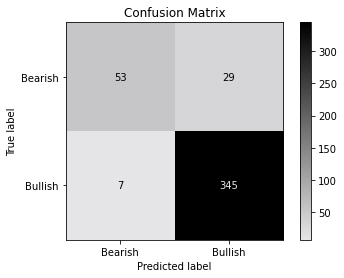

In [6]:
print(f"Accuracy of fine tuned cryptobert version 2 sentiment analysis on rows with non-NaN entities.sentiment.basic: {accuracy:.2f}")
evaluator_finetuned_cryptobert.show_confusion_matrix()

In [6]:
evaluator_finetuned_cryptobert.show_bad_samples(10)

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X I thought were dead
Prediction Confidency 
tensor([[8.3339e-04, 6.1794e-05, 9.9910e-01]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X    So rigged   All no name cryptos trending \n\nOk so those are more bought and desired ???  Wrong.  It’s manipulated. They hold the big ones back  $ETH.X $XRP.X
Prediction Confidency 
tensor([[1.2837e-03, 2.8274e-05, 9.9869e-01]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X \n\nDOGE/BUSD and SHIB/BUSD are among \n\nthe 23 margin trading pairs that will get\n\nDELISTED  from Binance on November 9.
Prediction Confidency 
tensor([[1.9073e-03, 1.4143e-05, 9.9808e-01]], grad_fn=<SoftmaxBackward0>)

---------------------

Actual Label: Bearish
Predicted Label: Bullish
Text: $ADA.X Here&#39;s the truth. This meme token is STILL down 16% on the year. XRP is the chosen 